In [2]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('T30YN.csv', index_col = 0, skiprows=0)
df=df.reset_index()
print(df.shape)
df.head(10)

(61, 8)


,Date,Price,Open,High,Low,Vol.,Change %,Date_m
0,01-Dec-17,154.38,152.97,155.28,152.88,40900,1.01,43070
1,04-Dec-17,154.12,153.62,154.31,153.19,13500,-0.17,43073
2,05-Dec-17,154.81,154.19,154.88,153.78,7540,0.45,43074
3,06-Dec-17,155.16,154.75,155.66,154.69,17100,0.23,43075
4,07-Dec-17,153.97,154.97,155.53,154.00,2130,-0.77,43076
5,08-Dec-17,154.00,154.22,154.34,153.69,5120,0.02,43077
6,11-Dec-17,154.16,154.12,154.66,154.03,2600,0.10,43080
7,12-Dec-17,153.78,154.16,154.16,153.31,1460,-0.25,43081
8,13-Dec-17,154.81,153.94,154.84,153.59,2280,0.67,43082
9,14-Dec-17,155.22,154.62,155.22,154.25,1990,0.26,43083


In [22]:
df=df.drop("Date",axis=1,inplace=False);
df=df.drop("Vol.",axis=1,inplace=False);
df=df.drop("Change %",axis=1,inplace=False);
df=df.drop("Low",axis=1,inplace=False);
df=df.drop("High",axis=1,inplace=False);
df=df.drop("Open",axis=1,inplace=False);
y =  df["Price"]
X = df.drop(["Price"],axis=1,inplace=False)
df.head(10)

,Price,Date_m
0,154.38,43070
1,154.12,43073
2,154.81,43074
3,155.16,43075
4,153.97,43076
5,154.00,43077
6,154.16,43080
7,153.78,43081
8,154.81,43082
9,155.22,43083


In [23]:
import numpy as np
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print("train set shape: %s, %s" %(X_train.shape[0],y_train.shape[0]) )
print("test set shape: %s, %s" %(X_test.shape[0],y_train.shape[0]) )
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
y_pred = reg.predict(X_test)  # predict the demand for X_test
mse = mean_squared_error(y_test, y_pred)  # Real vs predicted demand for X_test
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("pred set shape: %s" %(y_pred.shape[0]) )
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))



train set shape: 42, 42
test set shape: 19, 42
pred set shape: 19
mse = 1.508614635478487, rmse = 1.2282567465633913 
mae = 1.054438714699206 r2 = 0.8645713142163686


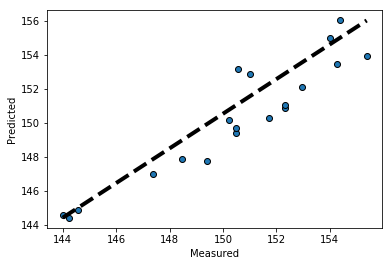

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [25]:
df = pd.read_csv('Dates2predict.csv', index_col = 0, skiprows=0)
df=df.reset_index()
df.head(10)

,Date_m
0,43109
1,43110
2,43111
3,43112
4,43113
5,43114
6,43115
7,43116
8,43117
9,43118


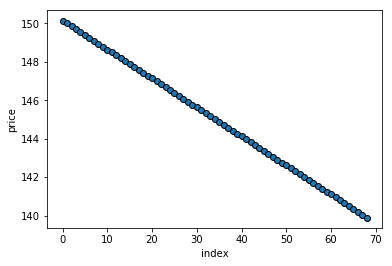

In [26]:
X_test = df
y_pred = reg.predict(X_test)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_test.index,y_pred, edgecolors=(0, 0, 0))
ax.set_xlabel('index')
ax.set_ylabel('price')
plt.show()


In [27]:

import numpy as np
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=123)


print("train set shape: %s, %s" %(X_train.shape[0],y_train.shape[0]) )
print("test set shape: %s, %s" %(X_test.shape[0],y_train.shape[0]) )
from sklearn import linear_model
reg = linear_model.Lasso()
reg.fit(X_train, y_train)

train set shape: 61, 61
test set shape: 0, 61


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

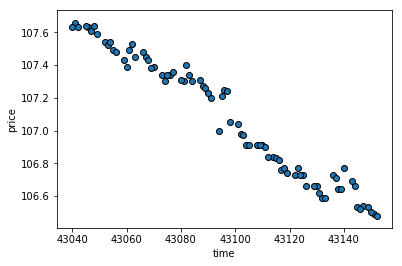

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_train,y_train, edgecolors=(0, 0, 0))
ax.set_xlabel('time')
ax.set_ylabel('price')
plt.show()


In [28]:
df = pd.read_csv('Dates2predict.csv', index_col = 0, skiprows=0)
df=df.reset_index()
X_test = df

X_test.head(10)


,Date_m
0,43109
1,43110
2,43111
3,43112
4,43113
5,43114
6,43115
7,43116
8,43117
9,43118


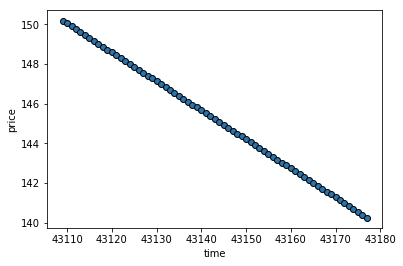

In [29]:
y_pred = reg.predict(X_test)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_test,y_pred, edgecolors=(0, 0, 0))
ax.set_xlabel('time')
ax.set_ylabel('price')
plt.show()

prediction = pd.DataFrame(X_test,y_pred).to_csv('prediction_30YTN.csv')
